# 1. отрисовать поля для файлов с 1 днем
# 2. отрисовать поля для файлов с 2 днями
# 3. учесть это в классе датасета, использовать csv файл
# 4. нормализация
# 5. аугментации

# Список переменных и соответствующих срезов
variables = {
    'mlotst': (0,),
    'thetao': (0, 0),
    'bottomT': (0,),
    'uo': (0, 0),
    'vo': (0, 0),
    'so': (0, 0),
    'zos': (0,)
}

# нужна таблица со столбцами
путь до файла, датавремя, индексы среза этого датавремени( для некоторых файлов будет по 2 строк и индексы среза будут [0] или [1])

через дату время отсортированную можно будет брать +-15 дней

In [1]:
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import glob
import matplotlib.pyplot as plt

In [2]:
# Путь к файлам .nc
pathes = sorted(glob.glob('/mnt/hippocamp/DATA/GLORYS12/????/*.nc'))

# Открываем первый файл
test_glorys = Dataset(pathes[0])
test_glorys2 = Dataset(pathes[1])
# Получаем все переменные в файле
variables = test_glorys.variables

# Перебираем переменные и выводим их long_name
for var_name in variables:
    var = variables[var_name]
    long_name = getattr(var, 'long_name', 'No long_name attribute')
    dimensions = var.dimensions
    print(f"Variable: {var_name}, Dimensions: {dimensions}, Long Name: {long_name}")


Variable: mlotst, Dimensions: ('time', 'latitude', 'longitude'), Long Name: Density ocean mixed layer thickness
Variable: siconc, Dimensions: ('time', 'latitude', 'longitude'), Long Name: Ice concentration
Variable: latitude, Dimensions: ('latitude',), Long Name: Latitude
Variable: usi, Dimensions: ('time', 'latitude', 'longitude'), Long Name: Sea ice eastward velocity
Variable: thetao, Dimensions: ('time', 'depth', 'latitude', 'longitude'), Long Name: Temperature
Variable: sithick, Dimensions: ('time', 'latitude', 'longitude'), Long Name: Sea ice thickness
Variable: bottomT, Dimensions: ('time', 'latitude', 'longitude'), Long Name: Sea floor potential temperature
Variable: vsi, Dimensions: ('time', 'latitude', 'longitude'), Long Name: Sea ice northward velocity
Variable: depth, Dimensions: ('depth',), Long Name: Depth
Variable: vo, Dimensions: ('time', 'depth', 'latitude', 'longitude'), Long Name: Northward velocity
Variable: uo, Dimensions: ('time', 'depth', 'latitude', 'longitude'),

In [3]:
variables = {
            'mlotst': (0,),
            'thetao': (0, 0),
            'bottomT': (0,),
            'uo': (0, 0),
            'vo': (0, 0),
            'so': (0, 0),
            'zos': (0,)
        }
len(variables)

7

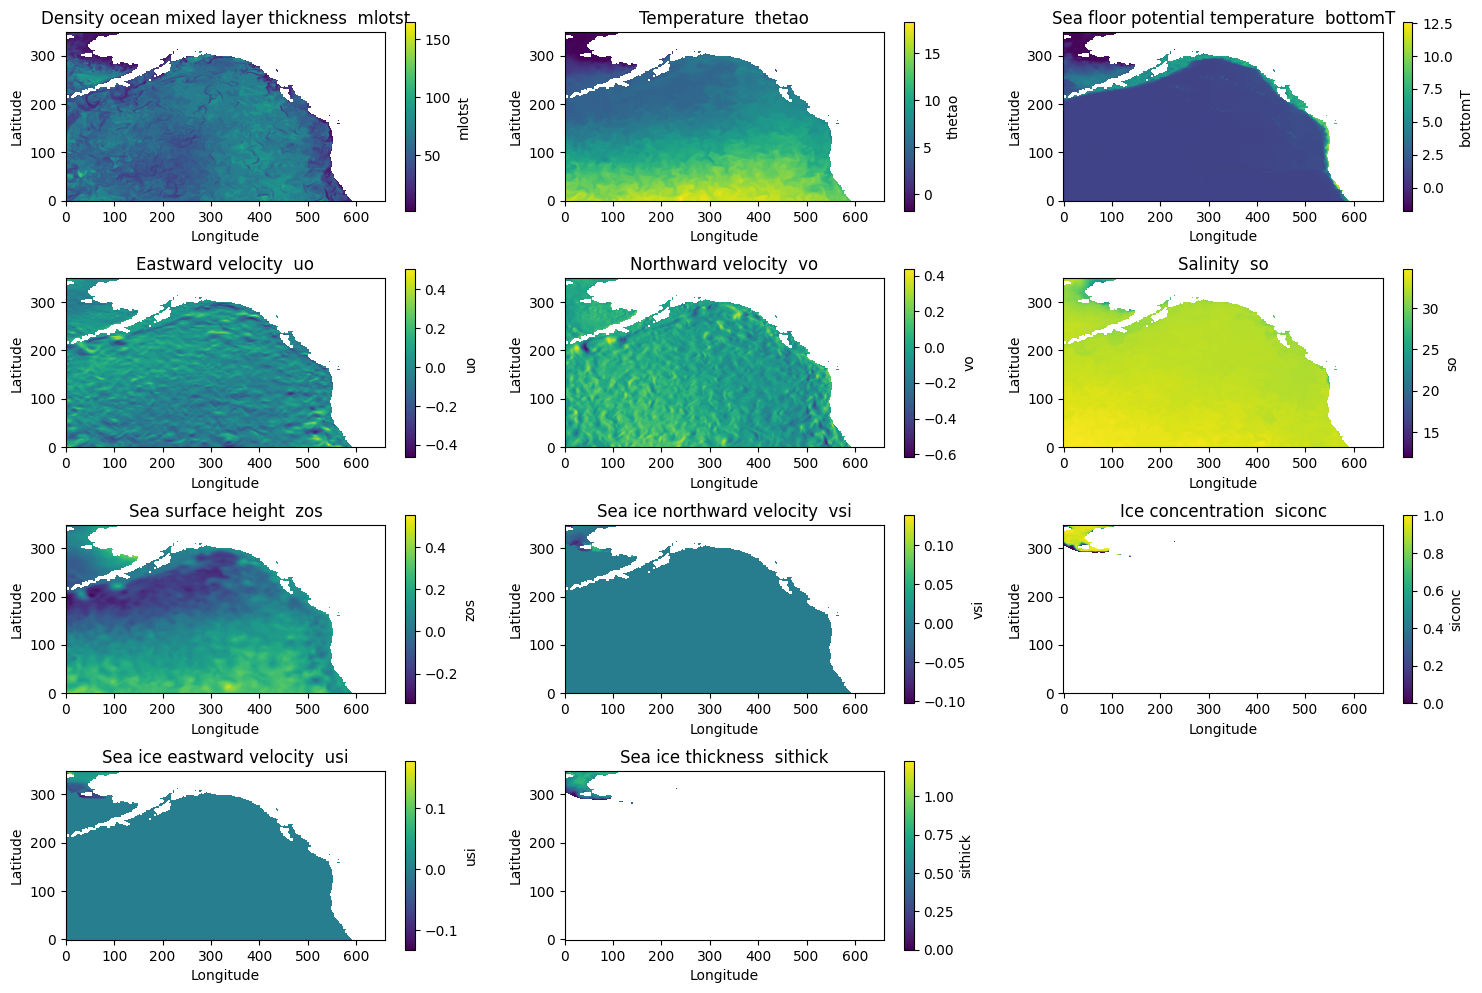

In [4]:


# # Путь к файлам .nc
# pathes = glob.glob('/mnt/hippocamp/DATA/GLORYS12/1993/*.nc')

# Открываем первый файл
test_glorys = Dataset(pathes[0])

# Список переменных и соответствующих срезов
variables = {
    'mlotst': (0,),
    'thetao': (0, 0),
    'bottomT': (0,),
    'uo': (0, 0),
    'vo': (0, 0),
    'so': (0, 0),
    'zos': (0,),
    'vsi': (0,),
    'siconc': (0,),
    'usi': (0,),
    'sithick': (0,)
}

# Подготовка к отображению
plt.figure(figsize=(15, 10))  # Размер фигуры

# Проходим по переменным и отрисовываем их
for i, (var_name, index) in enumerate(variables.items()):
    plt.subplot(4, 3, i + 1)  # Создаем подграфик (4 строки, 3 столбца)
    data_to_plot = test_glorys[var_name][index]  # Получаем данные с нужным срезом
    plt.imshow(data_to_plot, origin='lower', cmap='viridis')  # Отображаем данные
    plt.title(getattr(test_glorys[var_name], 'long_name', 'No long_name attribute')+'  ' + var_name)  # Устанавливаем заголовок
    # plt.title(var_name)  # Устанавливаем заголовок
    plt.colorbar(label=var_name)  # Добавляем цветовую шкалу
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

plt.tight_layout()  # Настройка для предотвращения наложения подграфиков
plt.show()


In [5]:
df = pd.read_csv('/app/MoCo/MOCOv3-MNIST/momental files and code/files_with_mean.csv')


# Фильтрация строк, где 'Mean' равно '--'
filtered_df = df[df['Mean'] == '--']

# Удаление строк из исходного DataFrame, где 'File Path' соответствует значениям в filtered_df
df = df[~df['File Path'].isin(filtered_df['File Path'])]
df['Mean'] = pd.to_numeric(df['Mean'])
df['Mean Square'] = pd.to_numeric(df['Mean Square'])
# Вывод результата
mean_values = df.groupby('Variable')[['Mean', 'Mean Square']].mean().reset_index()
mean_values
mean_values.to_csv('Variable_means.csv')
df.to_csv('numeric_files.csv')


In [11]:
df


,File Path,Variable,Time Dimension,Mean,Mean Square
0,/mnt/hippocamp/DATA/GLORYS12/1993/GLORYS12_REA...,mlotst,1,57.220813,3566.305737
1,/mnt/hippocamp/DATA/GLORYS12/1993/GLORYS12_REA...,thetao,1,8.820511,96.118359
2,/mnt/hippocamp/DATA/GLORYS12/1993/GLORYS12_REA...,bottomT,1,1.553553,4.630741
3,/mnt/hippocamp/DATA/GLORYS12/1993/GLORYS12_REA...,uo,1,0.000132,0.007058
4,/mnt/hippocamp/DATA/GLORYS12/1993/GLORYS12_REA...,vo,1,0.007357,0.007913
...,...,...,...,...,...
142326,/mnt/hippocamp/DATA/GLORYS12/2020/GLORYS12_REA...,vo,2,0.006451,0.009373
142327,/mnt/hippocamp/DATA/GLORYS12/2020/GLORYS12_REA...,so,1,32.511263,1058.370851
142328,/mnt/hippocamp/DATA/GLORYS12/2020/GLORYS12_REA...,so,2,32.513688,1058.502960
142329,/mnt/hippocamp/DATA/GLORYS12/2020/GLORYS12_REA...,zos,1,0.142259,0.057577


In [6]:
df['File Path'].loc[1][-13:-3]

'1993-01-01'

In [22]:
grouped_df = df.groupby('File Path').mean('Mean').reset_index()
grouped_df

,File Path,Time Dimension,Mean,Mean Square
0,/mnt/hippocamp/DATA/GLORYS12/1993/GLORYS12_REA...,1.0,14.333197,676.420991
1,/mnt/hippocamp/DATA/GLORYS12/1993/GLORYS12_REA...,1.0,14.370478,681.713052
2,/mnt/hippocamp/DATA/GLORYS12/1993/GLORYS12_REA...,1.0,14.223420,673.912048
3,/mnt/hippocamp/DATA/GLORYS12/1993/GLORYS12_REA...,1.0,14.273638,682.718676
4,/mnt/hippocamp/DATA/GLORYS12/1993/GLORYS12_REA...,1.0,14.542419,714.780819
...,...,...,...,...
10109,/mnt/hippocamp/DATA/GLORYS12/2020/GLORYS12_REA...,1.5,15.048245,755.948842
10110,/mnt/hippocamp/DATA/GLORYS12/2020/GLORYS12_REA...,1.5,14.923205,743.217284
10111,/mnt/hippocamp/DATA/GLORYS12/2020/GLORYS12_REA...,1.5,14.936264,747.905874
10112,/mnt/hippocamp/DATA/GLORYS12/2020/GLORYS12_REA...,1.5,15.130119,775.590159


In [34]:
a = 0
for _, row in grouped_df.iterrows():
    a = a +1
a

10114

In [61]:
import pandas as pd

# # Загрузка данных из CSV файла
# df = pd.read_csv('/app/files_with_mean.csv')

# Создаем список для хранения новых строк
new_data = []
a = 0
# Итерация по строкам DataFrame
for _, row in grouped_df.iterrows():
    file_path = row['File Path']
    time_dimension = row['Time Dimension']
    mean = row['Mean']
    mean_square = row['Mean Square']
    
    # Извлечение Datetime из File Path
    datetime_str = file_path[-13:-3]  # Извлечение нужной части строки
    datetime = pd.to_datetime(datetime_str)  # Преобразование в datetime
    
    # Определяем индекс и добавляем в новый DataFrame
    if time_dimension == 1:
        new_data.append({'File Path': file_path, 'Indexes': 0, 'Datetime': datetime})
    elif time_dimension == 1.5:
        new_data.append({'File Path': file_path, 'Indexes': 0, 'Datetime': datetime})
        # new_data.append({'File Path': file_path, 'Indexes': 1, 'Datetime': datetime + pd.Timedelta(days=1)})
    # else:
    #     new_data.append({'File Path': file_path, 'Indexes': 0, 'Datetime': datetime})
    #     new_data.append({'File Path': file_path, 'Indexes': 1, 'Datetime': datetime + pd.Timedelta(days=1)})
    a = a +1
# Создаем новый DataFrame
new_df = pd.DataFrame(new_data)
a


10114

In [ ]:
filtered_df = df[df['Datetime'] > (current_date + pd.Timedelta(days=15))]

In [66]:
new_df

,File Path,Indexes,Datetime
0,/mnt/hippocamp/DATA/GLORYS12/1993/GLORYS12_REA...,0,1993-01-01
1,/mnt/hippocamp/DATA/GLORYS12/1993/GLORYS12_REA...,0,1993-01-02
2,/mnt/hippocamp/DATA/GLORYS12/1993/GLORYS12_REA...,0,1993-01-03
3,/mnt/hippocamp/DATA/GLORYS12/1993/GLORYS12_REA...,0,1993-01-04
4,/mnt/hippocamp/DATA/GLORYS12/1993/GLORYS12_REA...,0,1993-01-05
...,...,...,...
10109,/mnt/hippocamp/DATA/GLORYS12/2020/GLORYS12_REA...,0,2020-12-27
10110,/mnt/hippocamp/DATA/GLORYS12/2020/GLORYS12_REA...,0,2020-12-28
10111,/mnt/hippocamp/DATA/GLORYS12/2020/GLORYS12_REA...,0,2020-12-29
10112,/mnt/hippocamp/DATA/GLORYS12/2020/GLORYS12_REA...,0,2020-12-30


In [41]:
import pandas as pd

# # Загрузка данных из CSV файла
# df = pd.read_csv('/app/files_with_mean.csv')

# Создаем список для хранения новых строк
new_data = []
a = 0
# Итерация по строкам DataFrame
for _, row in grouped_df.iterrows():
    file_path = row['File Path']
    time_dimension = row['Time Dimension']
    mean = row['Mean']
    mean_square = row['Mean Square']
    
    # Извлечение Datetime из File Path
    datetime_str = file_path[-13:-3]  # Извлечение нужной части строки
    datetime = pd.to_datetime(datetime_str)  # Преобразование в datetime
    
    # Определяем индекс и добавляем в новый DataFrame
    if time_dimension == 1:
        new_data.append({'File Path': file_path, 'Indexes': 0, 'Datetime': datetime})
    elif time_dimension == 1.5:
        new_data.append({'File Path': file_path, 'Indexes': 0, 'Datetime': datetime})
        new_data.append({'File Path': file_path, 'Indexes': 1, 'Datetime': datetime + pd.Timedelta(days=1)})
    # else:
    #     new_data.append({'File Path': file_path, 'Indexes': 0, 'Datetime': datetime})
    #     new_data.append({'File Path': file_path, 'Indexes': 1, 'Datetime': datetime + pd.Timedelta(days=1)})
    a = a +1
# Создаем новый DataFrame
new_df = pd.DataFrame(new_data)
a


10114

In [58]:
new_df['File Path'].iloc[-5:-1]


20102    /mnt/hippocamp/DATA/GLORYS12/2020/GLORYS12_REA...
20103    /mnt/hippocamp/DATA/GLORYS12/2020/GLORYS12_REA...
20104    /mnt/hippocamp/DATA/GLORYS12/2020/GLORYS12_REA...
20105    /mnt/hippocamp/DATA/GLORYS12/2020/GLORYS12_REA...
Name: File Path, dtype: object

In [59]:
new_df['File Path'].iloc[-1]

'/mnt/hippocamp/DATA/GLORYS12/2020/GLORYS12_REA_NEPacific-2020-12-31.nc'

In [60]:
Dataset(new_df['File Path'].iloc[-1])

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.4
    bulletin_date: 1993-01-06 00:00:00
    bulletin_type: operational
    comment: CMEMS product
    domain_name: GL12
    easting: longitude
    field_date: 1993-01-01 00:00:00
    field_julian_date: 15706.0
    field_type: mean
    forecast_range: 2-day_forecast
    forecast_type: hindcast
    history: 2017/04/06 14:05:19 MERCATOR OCEAN Netcdf creation
    institution: MERCATOR OCEAN
    julian_day_unit: days since 1950-01-01 00:00:00
    latitude_max: 90.0
    latitude_min: -80.0
    longitude_max: 179.9166717529297
    longitude_min: -180.0
    northing: latitude
    references: http://www.mercator-ocean.fr
    source: MERCATOR GLORYS12V1
    title: daily mean fields from Global Ocean Physics Analysis and Forecast updated Daily
    z_max: 5727.9169921875
    z_min: 0.49402499198913574
    copernicusmarine_version: 1.0.3
    dimensions(sizes): depth(1), latitude(349), longitude(661),

In [50]:
len(new_df['Datetime'].unique())

10228

In [49]:
len(new_df['File Path'].unique())

10114

In [45]:
new_df

,File Path,Indexes,Datetime
0,/mnt/hippocamp/DATA/GLORYS12/1993/GLORYS12_REA...,0,1993-01-01
1,/mnt/hippocamp/DATA/GLORYS12/1993/GLORYS12_REA...,0,1993-01-02
2,/mnt/hippocamp/DATA/GLORYS12/1993/GLORYS12_REA...,0,1993-01-03
3,/mnt/hippocamp/DATA/GLORYS12/1993/GLORYS12_REA...,0,1993-01-04
4,/mnt/hippocamp/DATA/GLORYS12/1993/GLORYS12_REA...,0,1993-01-05
...,...,...,...
20102,/mnt/hippocamp/DATA/GLORYS12/2020/GLORYS12_REA...,1,2020-12-30
20103,/mnt/hippocamp/DATA/GLORYS12/2020/GLORYS12_REA...,0,2020-12-30
20104,/mnt/hippocamp/DATA/GLORYS12/2020/GLORYS12_REA...,1,2020-12-31
20105,/mnt/hippocamp/DATA/GLORYS12/2020/GLORYS12_REA...,0,2020-12-31


In [46]:
20107 /2

10053.5

In [39]:
# Вывод результата
new_df['da']


,File Path,Indexes,Datetime
0,/mnt/hippocamp/DATA/GLORYS12/1993/GLORYS12_REA...,0,1993-01-01
1,/mnt/hippocamp/DATA/GLORYS12/1993/GLORYS12_REA...,0,1993-01-02
2,/mnt/hippocamp/DATA/GLORYS12/1993/GLORYS12_REA...,0,1993-01-03
3,/mnt/hippocamp/DATA/GLORYS12/1993/GLORYS12_REA...,0,1993-01-04
4,/mnt/hippocamp/DATA/GLORYS12/1993/GLORYS12_REA...,0,1993-01-05
...,...,...,...
20102,/mnt/hippocamp/DATA/GLORYS12/2020/GLORYS12_REA...,1,2020-12-30
20103,/mnt/hippocamp/DATA/GLORYS12/2020/GLORYS12_REA...,0,2020-12-30
20104,/mnt/hippocamp/DATA/GLORYS12/2020/GLORYS12_REA...,1,2020-12-31
20105,/mnt/hippocamp/DATA/GLORYS12/2020/GLORYS12_REA...,0,2020-12-31


In [15]:
grouped_df['Time Dimension'].describe()

count    10114.000000
mean         1.494018
std          0.054364
min          1.000000
25%          1.500000
50%          1.500000
75%          1.500000
max          1.500000
Name: Time Dimension, dtype: float64

In [103]:
len(df['File Path'].unique()) # похуй, пойдет

10114

In [95]:
mean_values

,Variable,Mean,Mean Square
0,bottomT,1.673302,5.995956
1,mlotst,33.375222,1720.173366
2,so,32.584333,1063.413836
3,thetao,11.152242,149.602784
4,uo,0.025353,0.009806
5,vo,-0.009072,0.008357
6,zos,0.073670,0.035208


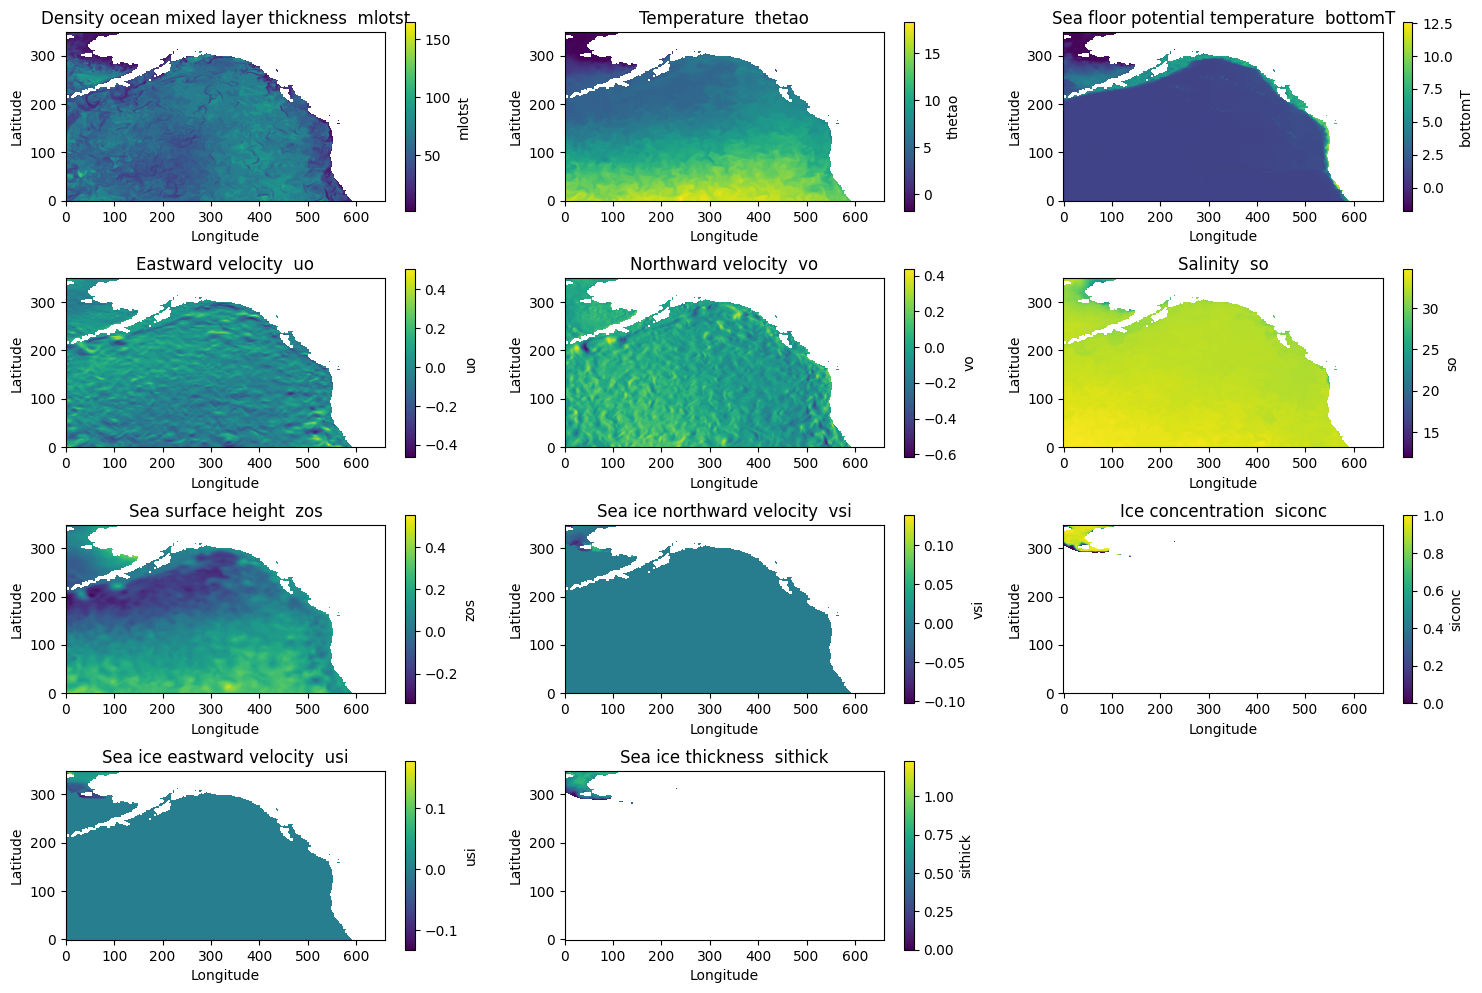

In [68]:
test_glorys = Dataset(pathes[0])
# Список переменных и соответствующих срезов
variables = {
    'mlotst': (0,),
    'thetao': (0, 0),
    'bottomT': (0,),
    'uo': (0, 0),
    'vo': (0, 0),
    'so': (0, 0),
    'zos': (0,),
    'vsi': (0,),
    'siconc': (0,),
    'usi': (0,),
    'sithick': (0,)
}

# Подготовка к отображению
plt.figure(figsize=(15, 10))  # Размер фигуры

# Проходим по переменным и отрисовываем их
for i, (var_name, index) in enumerate(variables.items()):
    plt.subplot(4, 3, i + 1)  # Создаем подграфик (4 строки, 3 столбца)
    data_to_plot = test_glorys[var_name][index]  # Получаем данные с нужным срезом
    plt.imshow(data_to_plot, origin='lower', cmap='viridis')  # Отображаем данные
    plt.title(getattr(test_glorys[var_name], 'long_name', 'No long_name attribute')+'  ' + var_name)  # Устанавливаем заголовок
    # plt.title(var_name)  # Устанавливаем заголовок
    plt.colorbar(label=var_name)  # Добавляем цветовую шкалу
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

plt.tight_layout()  # Настройка для предотвращения наложения подграфиков
plt.show()

# ХЗ почему
## но есть порядка 600 файлов, где нет данных, но есть маскированный массив, пока их кикну


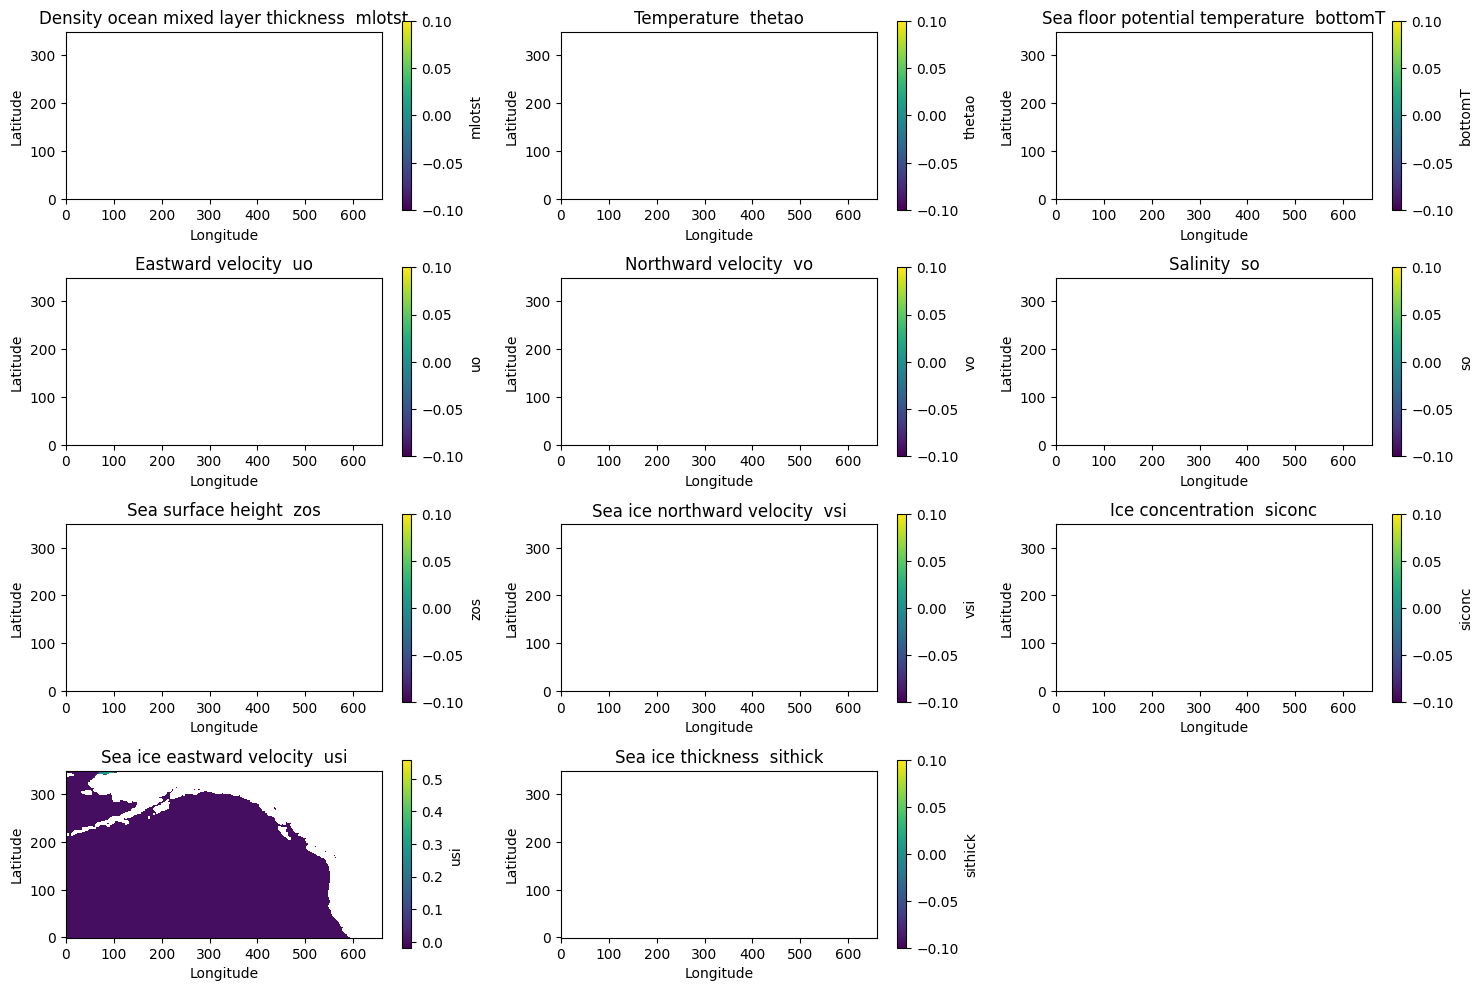

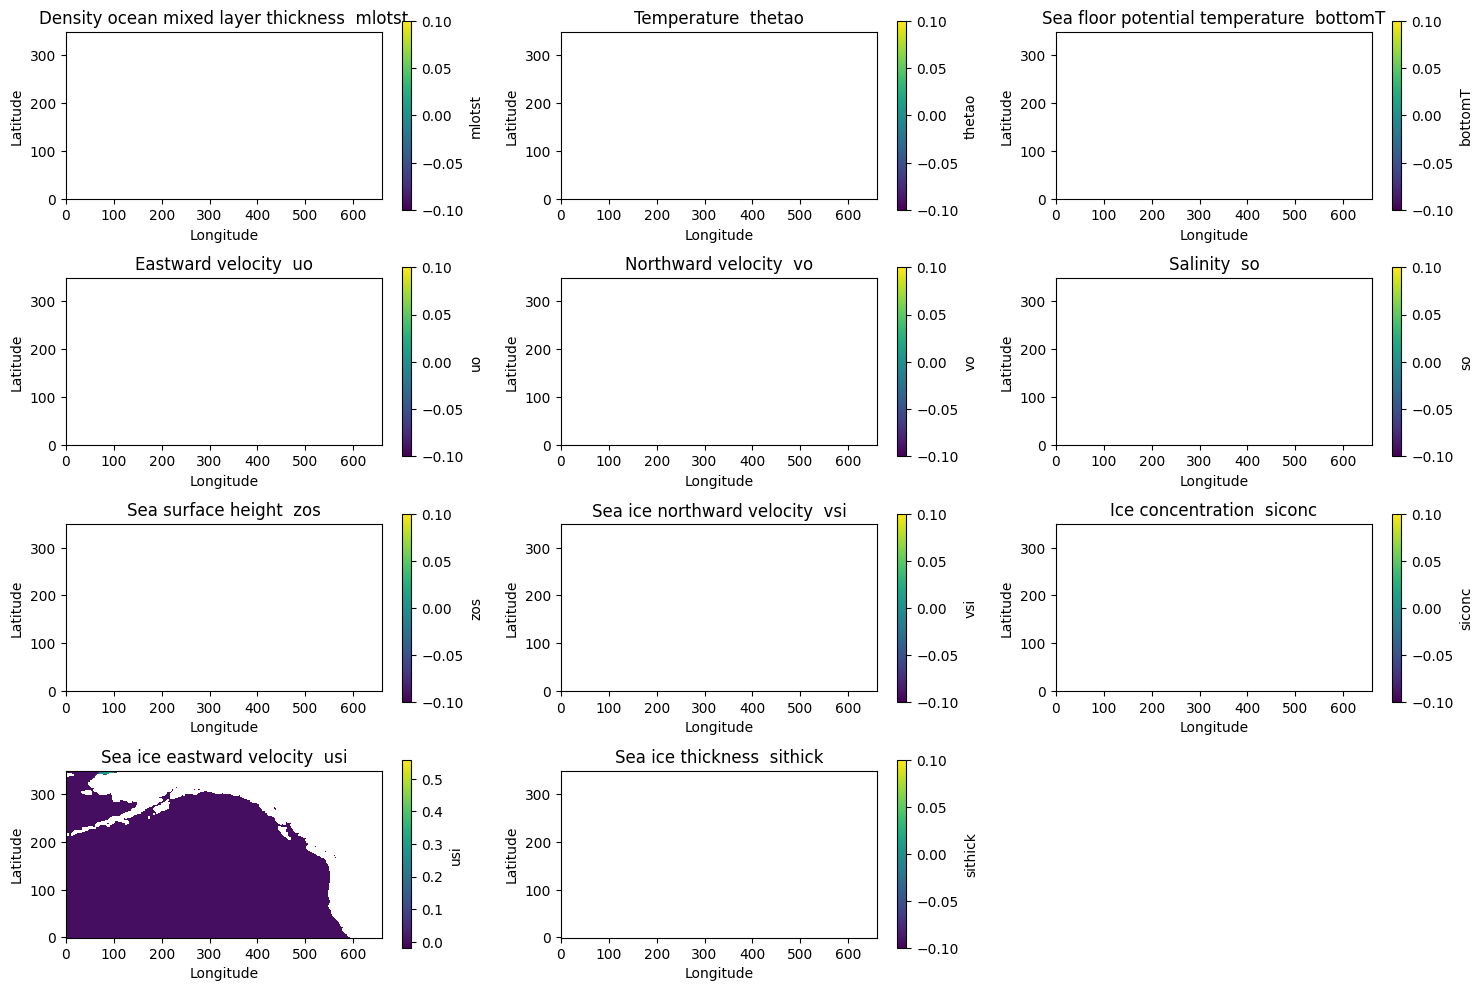

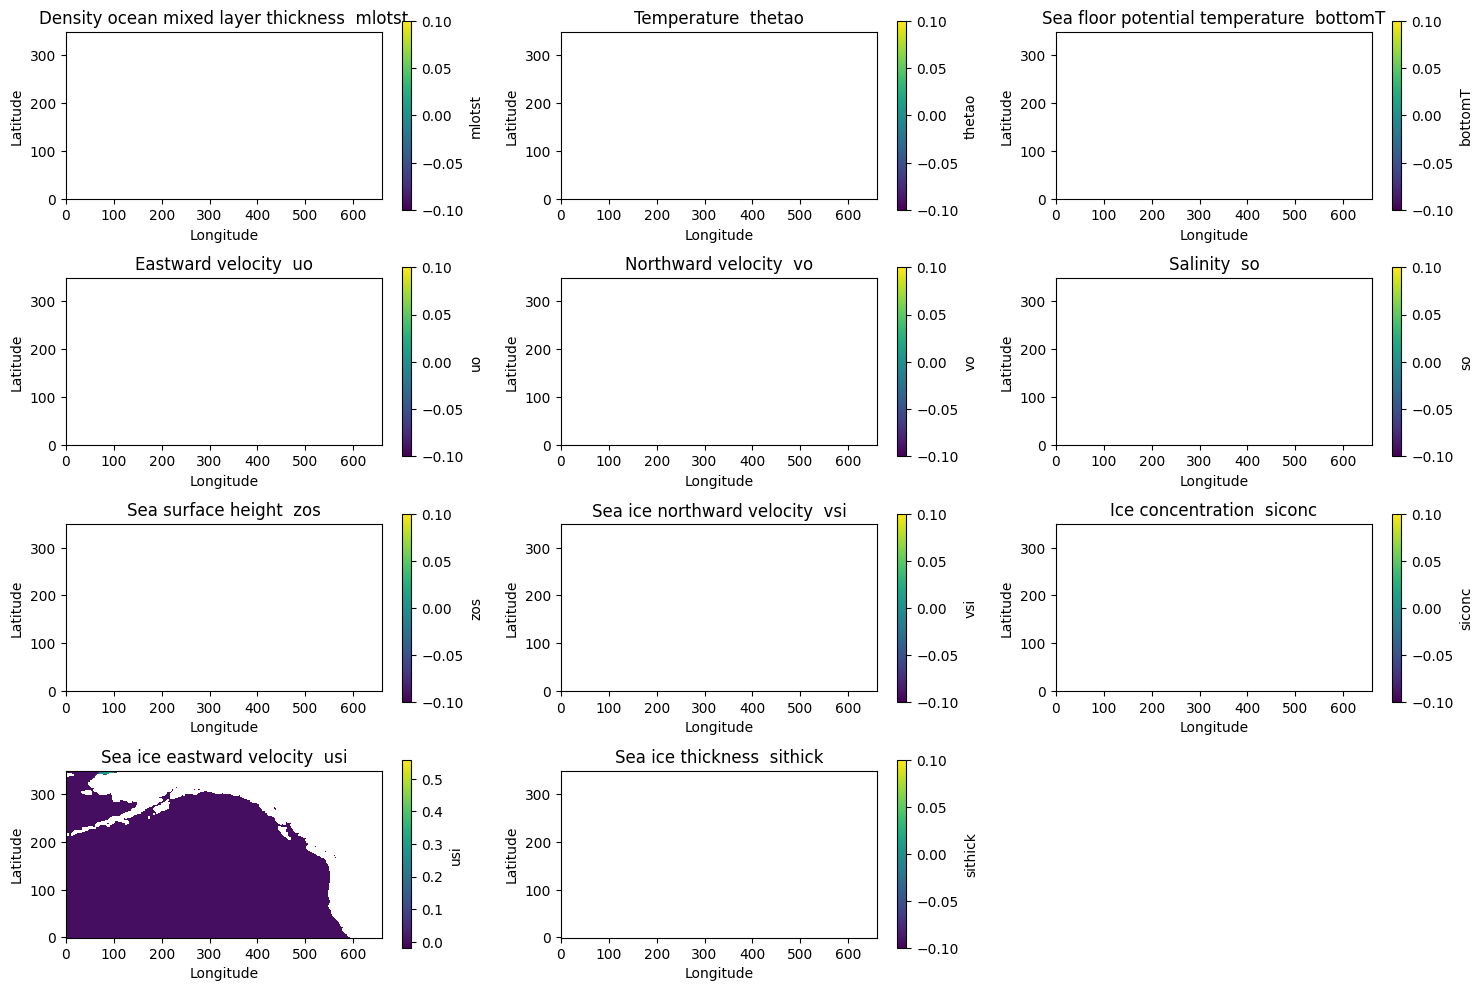

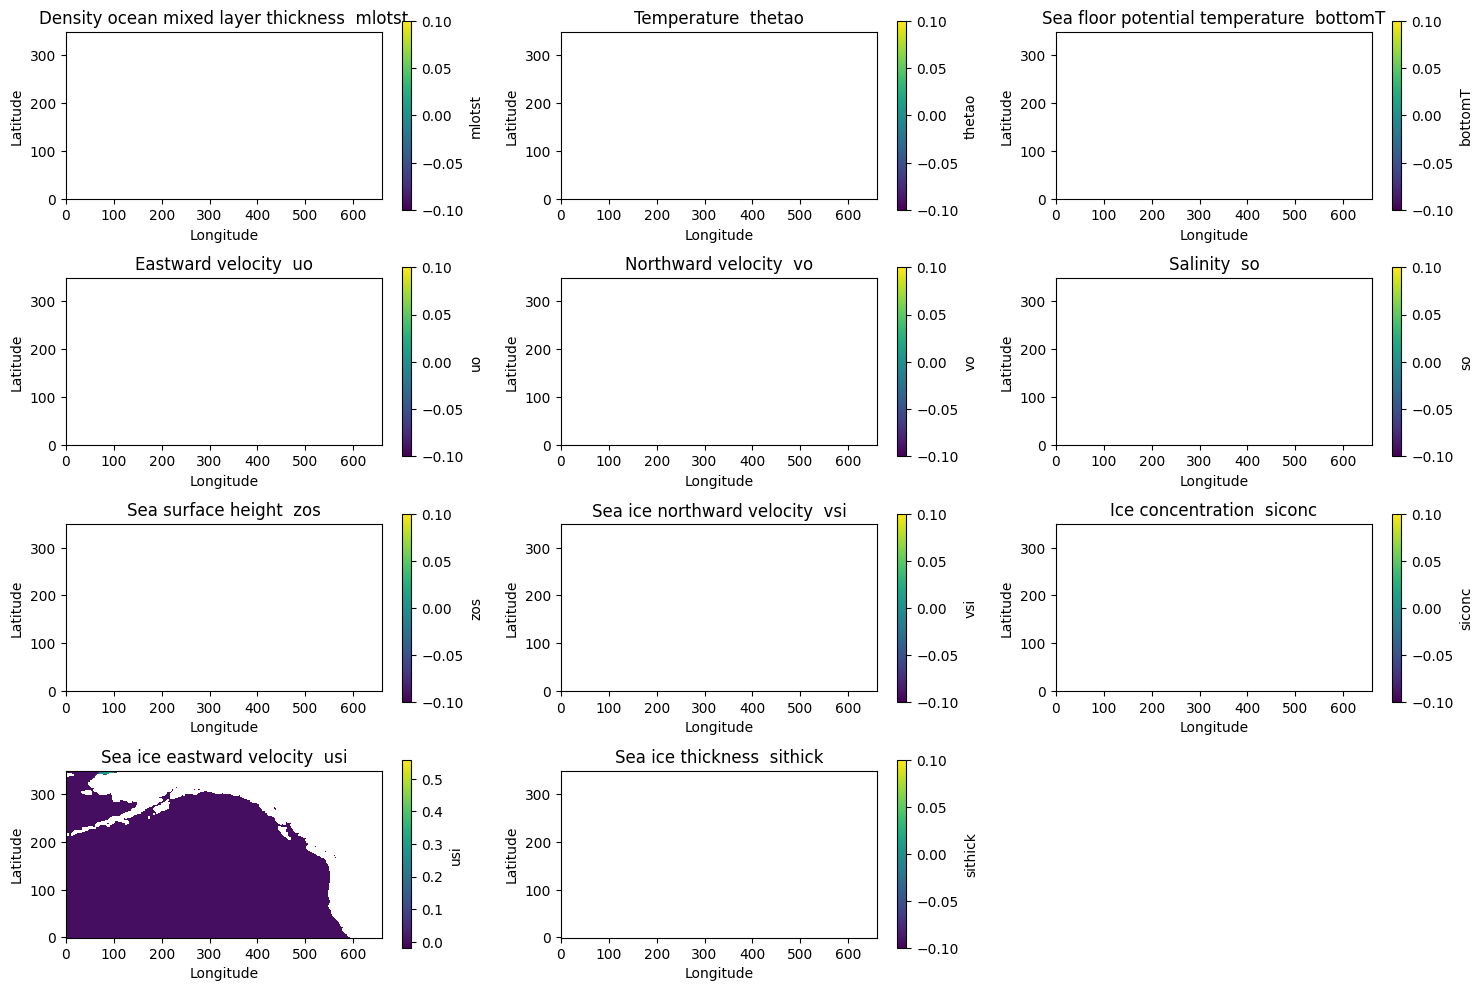

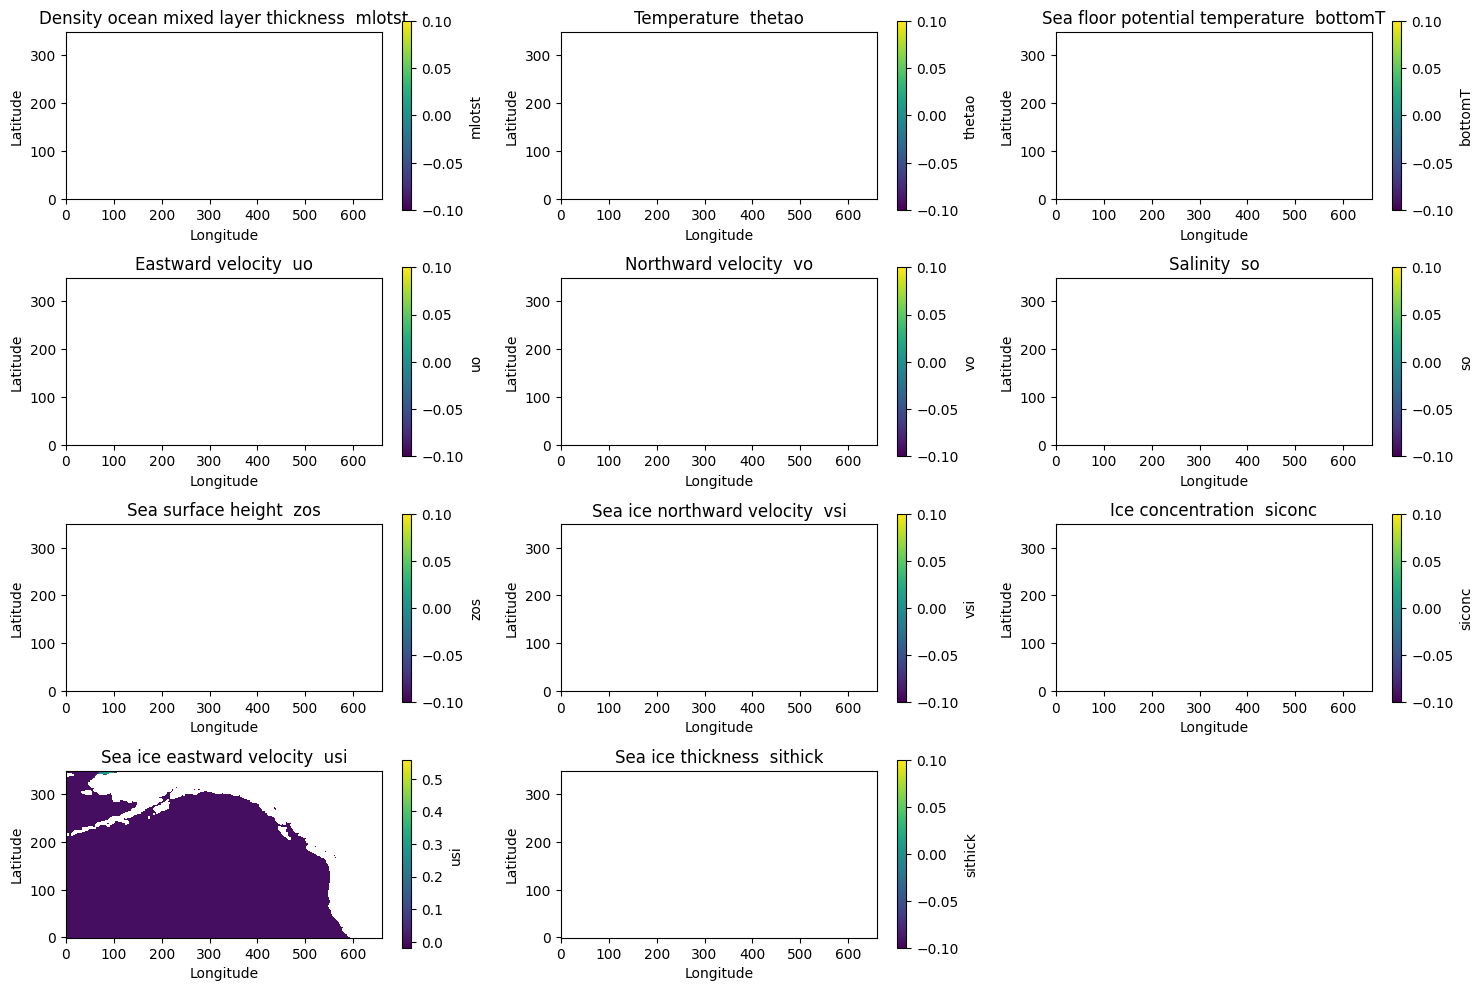

In [69]:
# Итерация по значениям в столбце 'File Path'
ids = 0
for index, row in filtered_df.iterrows():
    file_path = row['File Path']
    test_glorys = Dataset(file_path)
    # Список переменных и соответствующих срезов
    variables = {
        'mlotst': (0,),
        'thetao': (0, 0),
        'bottomT': (0,),
        'uo': (0, 0),
        'vo': (0, 0),
        'so': (0, 0),
        'zos': (0,),
        'vsi': (0,),
        'siconc': (0,),
        'usi': (0,),
        'sithick': (0,)
    }

    # Подготовка к отображению
    plt.figure(figsize=(15, 10))  # Размер фигуры

    # Проходим по переменным и отрисовываем их
    for i, (var_name, index) in enumerate(variables.items()):
        plt.subplot(4, 3, i + 1)  # Создаем подграфик (4 строки, 3 столбца)
        data_to_plot = test_glorys[var_name][index]  # Получаем данные с нужным срезом
        plt.imshow(data_to_plot, origin='lower', cmap='viridis')  # Отображаем данные
        plt.title(getattr(test_glorys[var_name], 'long_name', 'No long_name attribute')+'  ' + var_name)  # Устанавливаем заголовок
        # plt.title(var_name)  # Устанавливаем заголовок
        plt.colorbar(label=var_name)  # Добавляем цветовую шкалу
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')

    plt.tight_layout()  # Настройка для предотвращения наложения подграфиков
    plt.show()
    ids = ids +1 
    if ids >=5 :
        break

In [108]:
import pandas as pd

# Загрузка данных из CSV файла
df = pd.read_csv('/app/MoCo/MOCOv3-MNIST/momental files and code/files_with_dimensions.csv')

# Извлечение строки по позиции
position_to_extract = 5  # укажите позицию, которую вы хотите извлечь
row = df.loc[position_to_extract]

# Вывод результата
print(row)

File Path                    /mnt/hippocamp/DATA/GLORYS12/1993/GLORYS12_REA...
Number of Time Dimensions                                                    1
Latitude Dimension                                                         349
Longitude Dimension                                                        661
variables                    dict_keys(['mlotst', 'siconc', 'latitude', 'us...
Name: 5, dtype: object


In [109]:
row['File Path']

'/mnt/hippocamp/DATA/GLORYS12/1993/GLORYS12_REA_NEPacific-1993-01-06.nc'